<a href="https://colab.research.google.com/github/yashikart/rnn/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


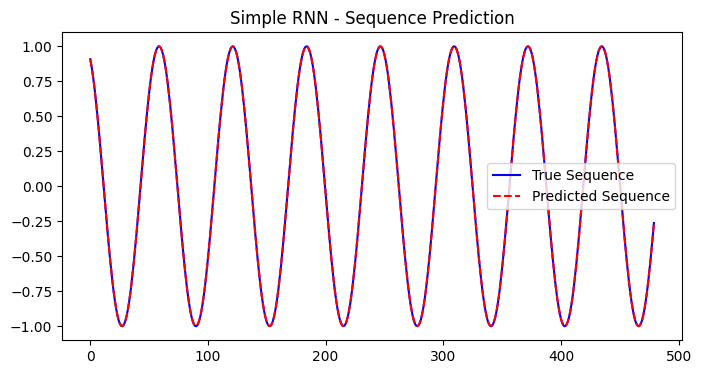

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# ----- Generate Sequential Data (Sine Wave) -----
def generate_data(seq_length=50):
    x = np.linspace(0, 50, 500)
    y = np.sin(x)
    X, Y = [], []
    for i in range(len(y) - seq_length):
        X.append(y[i:i + seq_length])
        Y.append(y[i + seq_length])
    return np.array(X), np.array(Y)

seq_length = 20
X, y = generate_data(seq_length)

# Reshape input to (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(-1, 1)

# ----- Build Simple RNN Model -----
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

# ----- Compile Model -----
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# ----- Train Model -----
history = model.fit(X, y, epochs=50, batch_size=16, verbose=0)

# ----- Predict Next Values -----
preds = model.predict(X)

# ----- Plot the Results -----
plt.figure(figsize=(8,4))
plt.plot(y, label='True Sequence', color='blue')
plt.plot(preds, label='Predicted Sequence', color='red', linestyle='--')
plt.legend()
plt.title("Simple RNN - Sequence Prediction")
plt.show()


Key Points about RNN (Recurrent Neural Network)

RNN = Recurrent Neural Network — It processes sequential data (data with time or order, like stock prices, text, or sensor readings).

Memory — It remembers previous inputs using a hidden state, which helps it understand time patterns.

Use case — Time-series prediction, speech, or natural language tasks.

Main Layers

SimpleRNN: learns from sequences step by step.

Dense: gives the final output (e.g., the next predicted number).

Activation Function (tanh) — Keeps values between -1 and 1 for stability.

Loss Function (MSE) — Measures how close predictions are to the actual data.

Optimizer (Adam) — Adjusts weights to minimize error automatically.

💻 Code Explained Simply
1️⃣ Generate Sequential Data
x = np.linspace(0, 50, 500)
y = np.sin(x)


Makes a sine wave (a repeating curve).

The goal is to predict the next point in the wave.

2️⃣ Prepare Data
X, Y = [], []
for i in range(len(y) - seq_length):
    X.append(y[i:i + seq_length])
    Y.append(y[i + seq_length])


Each input (X) is a sequence of 20 past values.

Each output (Y) is the next value after those 20.

3️⃣ Reshape Data
X = X.reshape((X.shape[0], X.shape[1], 1))


RNNs need 3D input:
(samples, timesteps, features) → here: (480, 20, 1)

4️⃣ Build Model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])


One RNN layer with 50 memory units.

One output neuron (predicts next number).

5️⃣ Compile Model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


Uses Adam optimizer.

MSE = Mean Squared Error (good for numeric prediction).

6️⃣ Train Model
model.fit(X, y, epochs=50, batch_size=16, verbose=0)


Teaches the RNN for 50 rounds (epochs).

7️⃣ Predict and Plot
preds = model.predict(X)
plt.plot(y, label='True Sequence')
plt.plot(preds, label='Predicted Sequence')


Predicts next points.

Plots true vs predicted sine wave.

📈 Output

You’ll see:

The blue line → real sine wave

The red dashed line → RNN’s predicted wave (closely follows the true one)

✅ Summary in one line:
This RNN learns the pattern of a sine wave and predicts the next values based on previous steps.